In [18]:
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

/Users/liuyixin/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [45]:
#1) index number 2) address
#two real-valued features are computed for each cell nucleus:
#a) latitude of the address
#b) longitude of the address

In [49]:
import pandas as pd
df=pd.read_csv("G3D.csv")
print(len(df.columns))
print(len(df.index))

4
452


In [50]:
print(df.columns)
df.head()

Index(['index', 'address', 'latitude', 'longitude'], dtype='object')


,index,address,latitude,longitude
0,0,19th & E Street NW,38.896015,-77.049911
1,1,California St & Florida Ave NW,38.917761,-77.040620
2,2,Jefferson Memorial,38.881406,-77.036551
3,3,Army Navy Dr & S Nash St,38.861744,-77.068061
4,4,16th & K St NW,38.902578,-77.055190


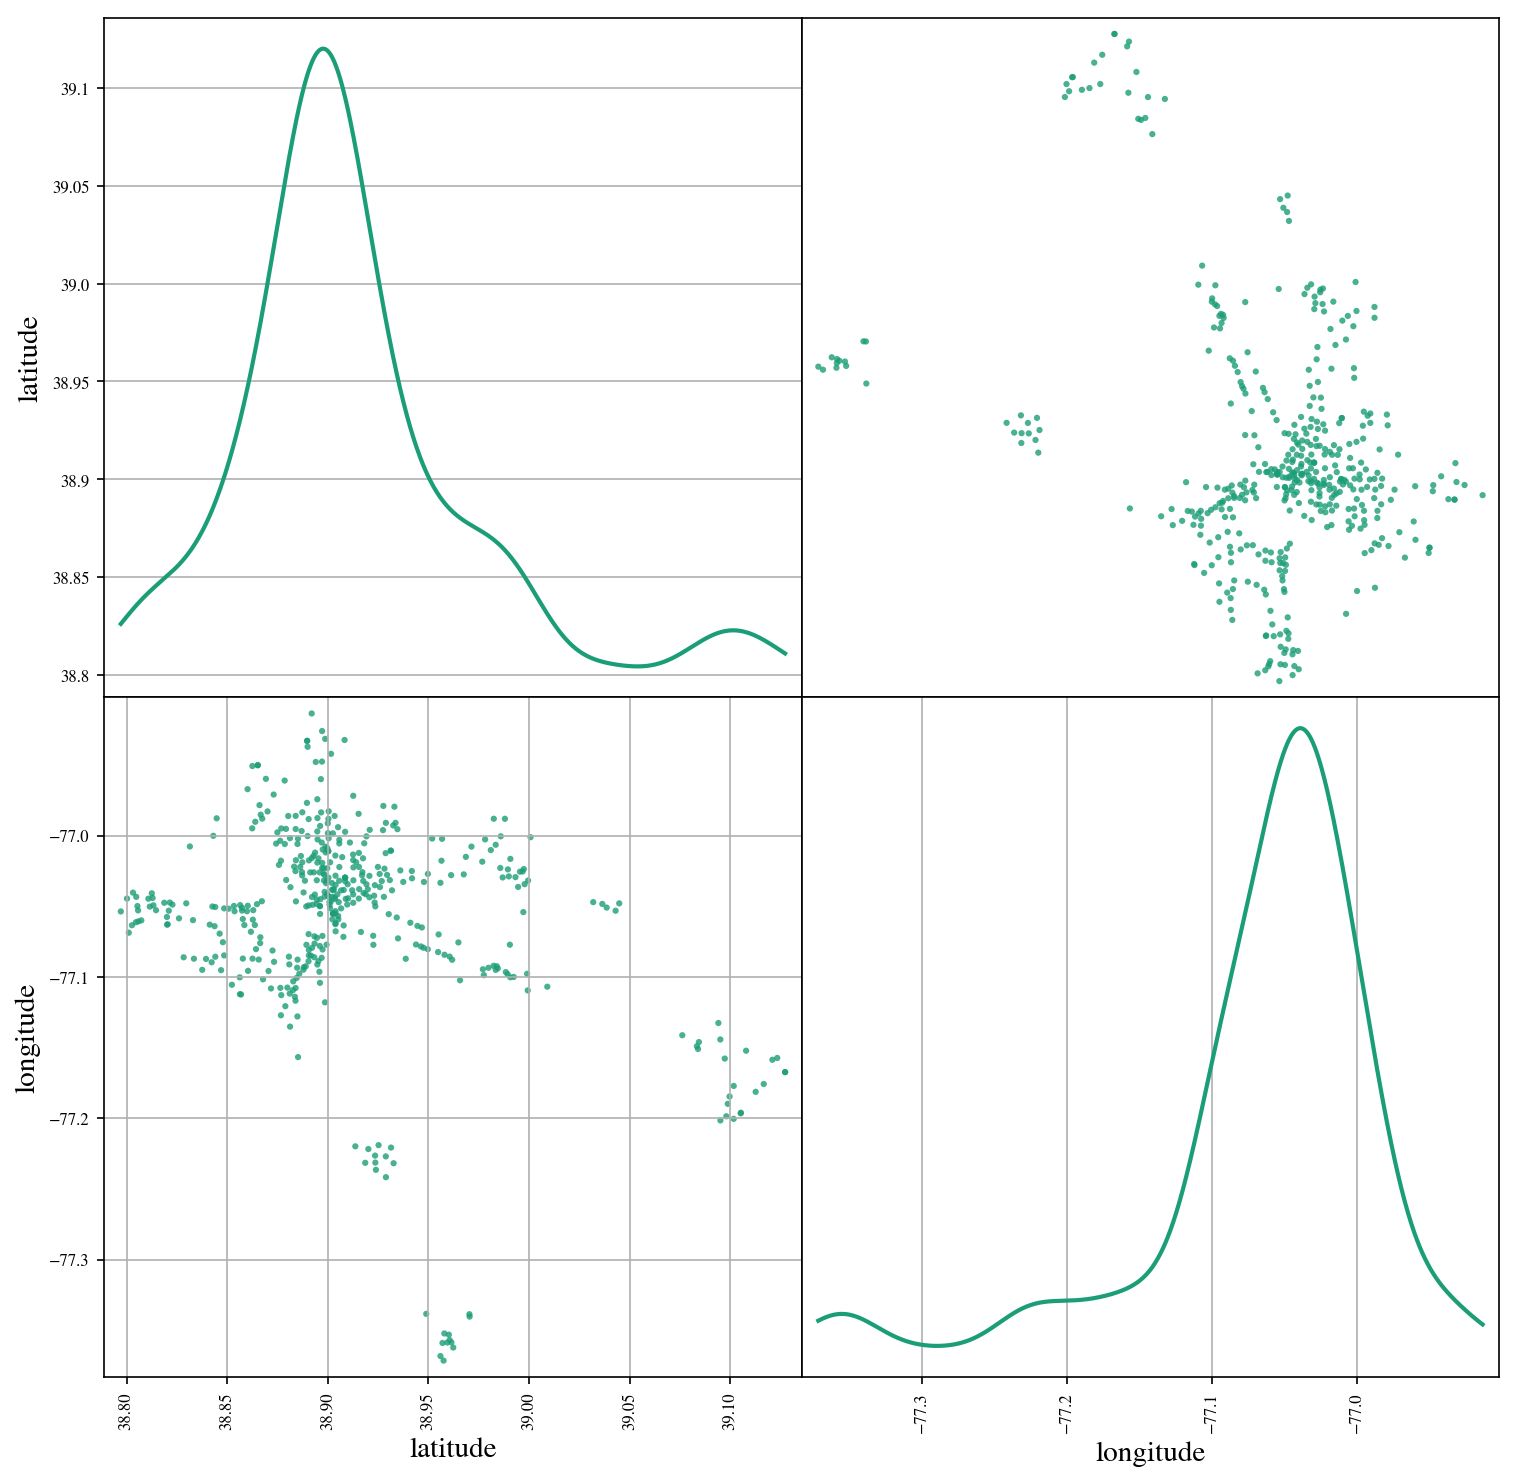

In [51]:
smaller_frame=df[['latitude', 'longitude']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(True)
plt.show()

In [22]:
smaller_frame.corr()

,latitude,longitude
latitude,1.00000,-0.34157
longitude,-0.34157,1.00000


In [23]:
from sklearn.linear_model import LinearRegression
X_HD=smaller_frame[['latitude', 'longitude']].values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
latitude_std_vec=X_HDn[:,0]
latitude_std=latitude_std_vec.reshape(-1,1)
longitude_std_vec=X_HDn[:,1]
longitude_std=longitude_std_vec.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(latitude_std, longitude_std)

In [25]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)

[[-0.36446602]] [ 0.00968249]


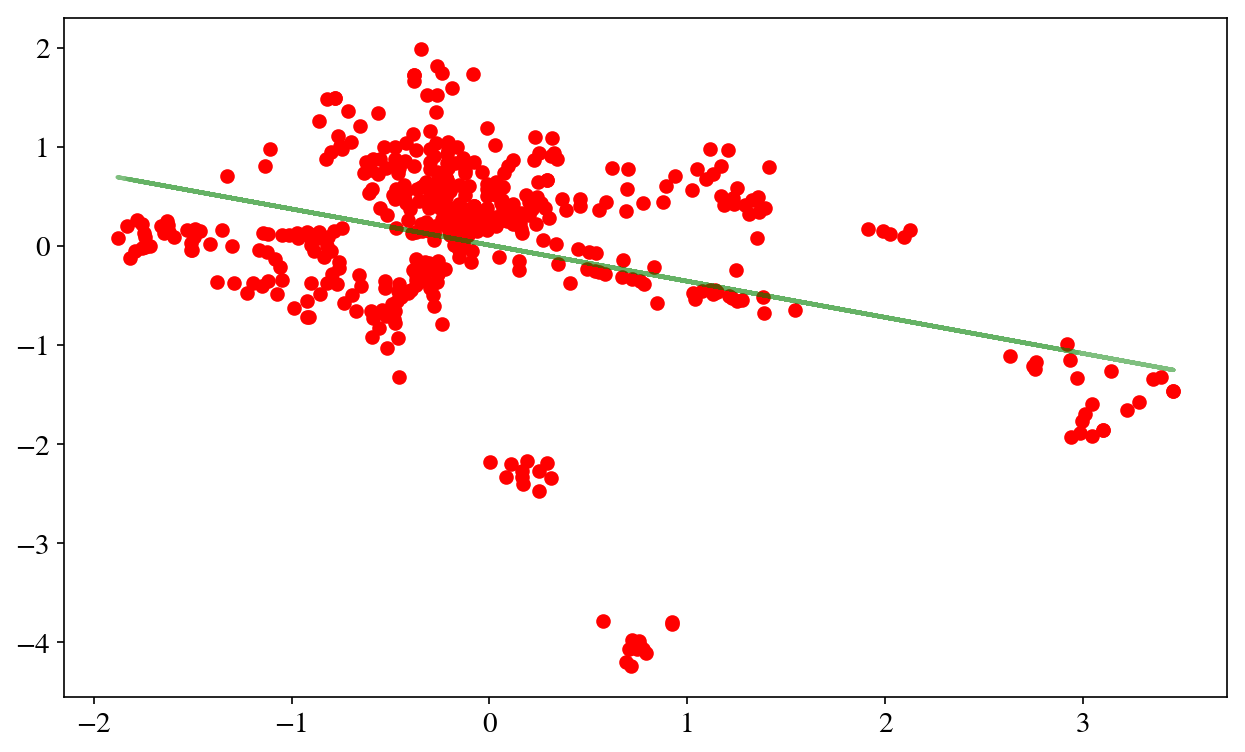

In [36]:
plt.scatter(latitude_std_vec, longitude_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)
plt.show(1)

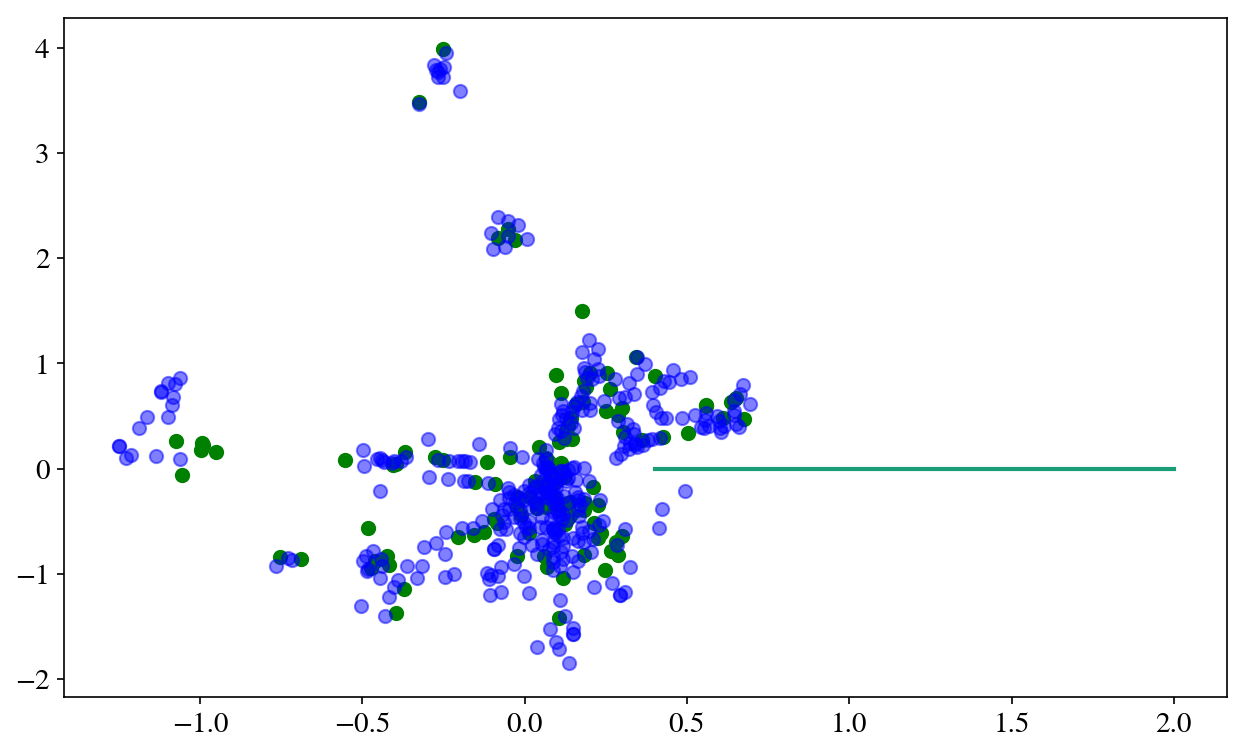

In [37]:
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])
plt.show(2)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)

[ 0.67078511  0.32921489]


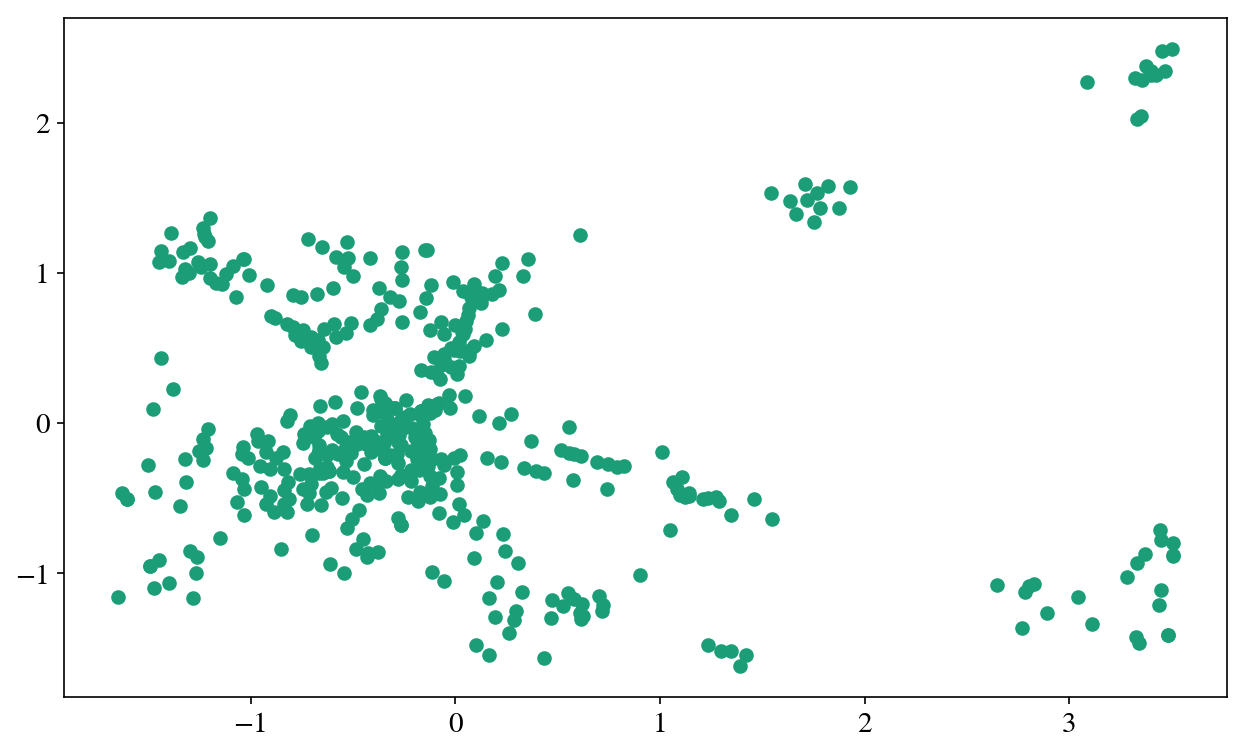

In [39]:
plt.scatter(X[:, 0], X[:, 1])
plt.show(3)

In [40]:
pca1 = PCA(n_components=1) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

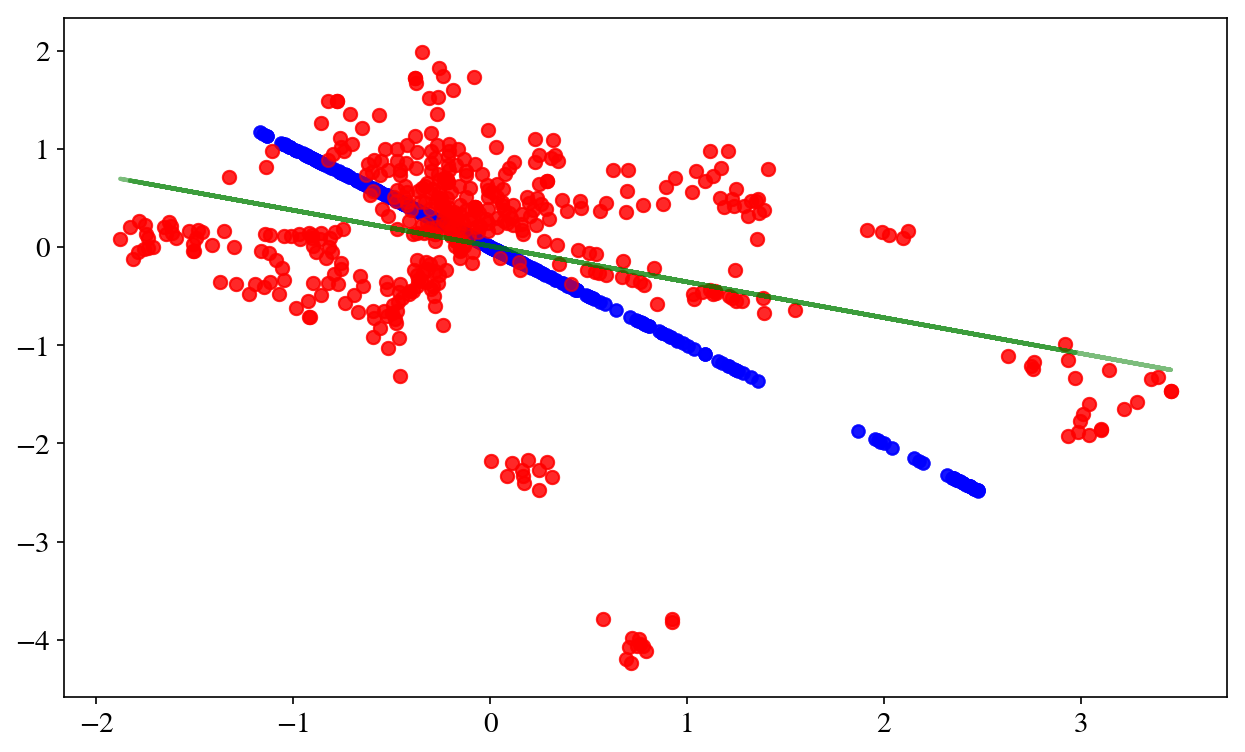

In [42]:
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
plt.scatter(latitude_std_vec, longitude_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)
plt.show(4)

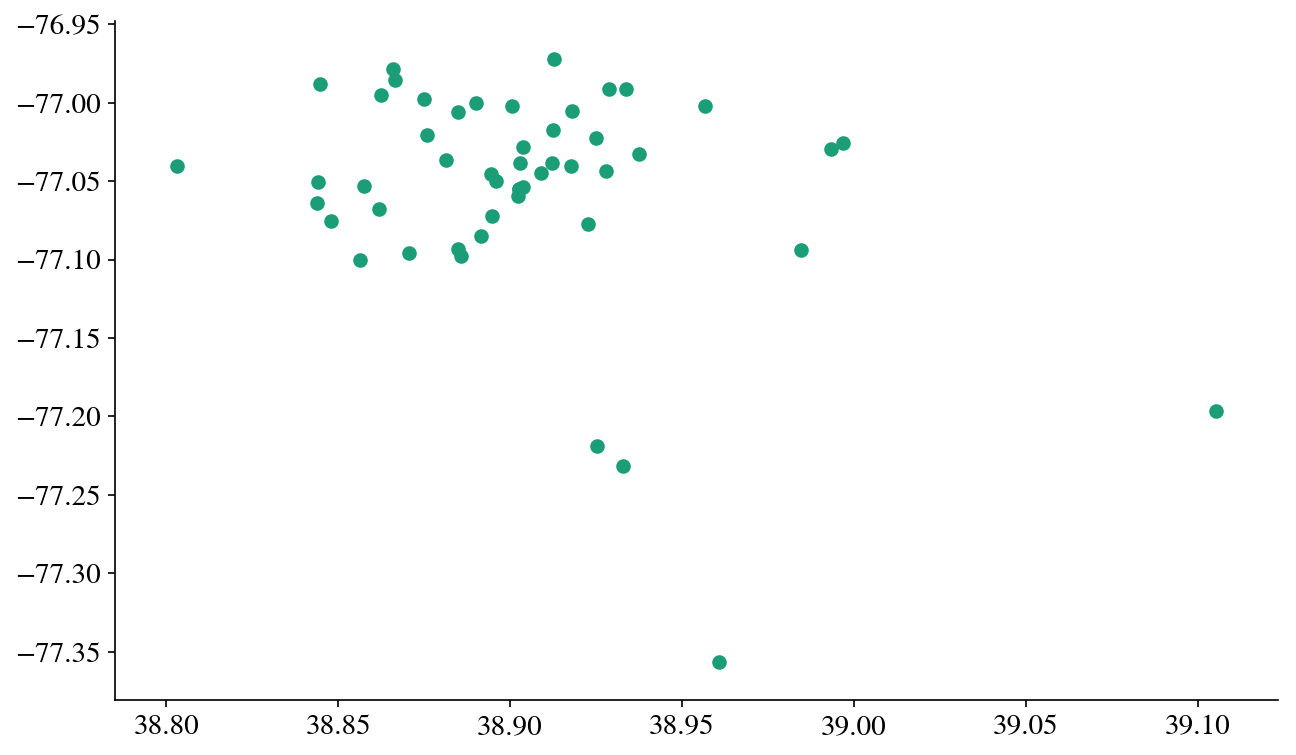

In [65]:
LL=df['latitude'][:50]
GG=df['longitude'][:50]
plt.scatter(LL, GG)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.show(5)

In [72]:
from sklearn.linear_model import LogisticRegression
reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(LL.reshape(-1,1), GG)

/Users/liuyixin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


ValueError: Unknown label type: 'continuous'